In [79]:
#Basic libraries

import numpy,tweepy
print(tweepy.__version__)
import datetime 
from datetime import timedelta
import pandas as pd
import numpy as np
import os

4.8.0


In [80]:
#twitter sentiment analysis

# Import Libraries
from textblob import TextBlob
import sys
import matplotlib.pyplot as plt
import nltk
#import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

nltk.downloader.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')  

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [81]:
access_token = '229756195-sYJXD5dgQLRnI5JeMenTKHG8SADveQqCgtWuzWA6'
access_token_secret = 'D5tmMAd2zD9RsDKm5Iyl1nCOmqHZ2Bv4RarwP7Kw37w2n'
consumer_key = 'P3I5eflqd62TTiDMwJxOkNTm7'
consumer_secret_key = 'ecIDxnYNI4rVlBisvttMM6ReR5WpOZuVubZNY0vjxYXeGmeARa'
#Authenticate tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret_key)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [84]:
def percentage(part,whole):
    return 100 * float(part)/float(whole)
keyword = input("Please enter keyword or hashtag to search:")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))
#tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
tweets = tweepy.Cursor(api.search_tweets,
              q=keyword,
              lang="en").items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []



Please enter keyword or hashtag to search: unitedairlines
Please enter how many tweets to analyze:  100


In [85]:
for tweet in tweets:
    
 #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity

    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1
    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1

    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')




In [86]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  100
positive number:  40
negative number:  27
neutral number:  33


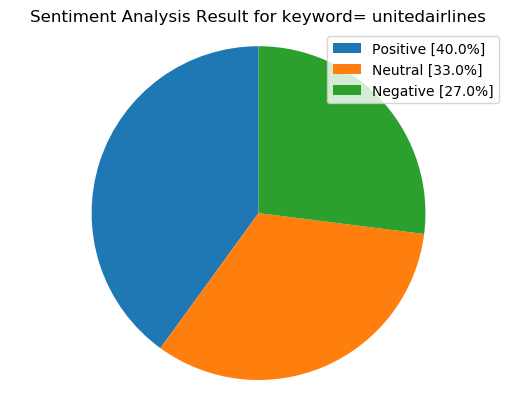

In [87]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
#colors = [‘yellowgreen’, ‘blue’,’red’]
patches, texts = plt.pie(sizes, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+keyword+"" )
plt.axis('equal')
plt.show()

In [88]:
pd.set_option('display.max_colwidth', -1)
tweet_list.head(12)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



,0
0,"@thevirdas @UnitedAirlines_ On a more serious note, hope you are feeling better Vir and really hope all is well. Please take care…"
1,@thevirdas With your personal recommendation @UnitedAirlines_ is gifting one to you soon :)
2,@Unitedairlines thanks for ruining my birthday!
3,Wish me luck cause I’m on this janky ass @UnitedAirlines_ flight 🤦🏾‍♀️🤦🏾‍♀️🤦🏾‍♀️
4,I’m at Logan International waiting for my flight home and there’s not a single United employee to be found. I asked… https://t.co/3bNUPbbHpg
5,"@UnitedAirlines folks, just realized if you rent Hertz rent a car you get more miles than you fly between Newark to… https://t.co/Pa1NsikJ2R"
6,@CoryBooker Why would #Civil Servants protect the unlawful interests of #UnitedAirlines over individual Civil Right… https://t.co/6y3WlAsWhx
7,@UnitedAirlines_ a week later I am still trying to seek a resolution with my very delayed flight to Seattle. I am… https://t.co/J9caAtpc8J
8,@davenewworld_2 Obviously not on #UnitedAirlines\n\n#united \nhttps://t.co/8LXU2KbHtc
9,ICAO: #A18CBB\nFlt: #UAL906 #UnitedAirlines\nFirst seen: 2022/04/17 13:04:12\nMin Alt: 11250 ft MSL\nMin Dist: 0.85 km… https://t.co/jCgaK5PIox


In [89]:
#Cleaning Tweets to Analyse Sentiment
tweet_list.drop_duplicates(inplace = True)

In [90]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0–9]+)|([0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
#tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
#tw_list["text"] = tw_list.text.str.lower()


spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–","\n"]
for char in spec_chars:
    tw_list["text"] = tw_list["text"].str.replace(char, ' ')
tw_list.head(10)

,0,text
0,"@thevirdas @UnitedAirlines_ On a more serious note, hope you are feeling better Vir and really hope all is well. Please take care…",thevirdas UnitedAirlines On a more serious note hope you are feeling better Vir and really hope all is well Please take care…
1,@thevirdas With your personal recommendation @UnitedAirlines_ is gifting one to you soon :),thevirdas With your personal recommendation UnitedAirlines is gifting one to you soon
2,@Unitedairlines thanks for ruining my birthday!,Unitedairlines thanks for ruining my birthday
3,Wish me luck cause I’m on this janky ass @UnitedAirlines_ flight 🤦🏾‍♀️🤦🏾‍♀️🤦🏾‍♀️,Wish me luck cause I’m on this janky ass UnitedAirlines flight 🤦🏾‍♀️🤦🏾‍♀️🤦🏾‍♀️
4,I’m at Logan International waiting for my flight home and there’s not a single United employee to be found. I asked… https://t.co/3bNUPbbHpg,I’m at Logan International waiting for my flight home and there’s not a single United employee to be found I asked… https t co 3bNUPbbHpg
5,"@UnitedAirlines folks, just realized if you rent Hertz rent a car you get more miles than you fly between Newark to… https://t.co/Pa1NsikJ2R",UnitedAirlines folks just realized if you rent Hertz rent a car you get more miles than you fly between Newark to… https t co Pa1NsikJ2R
6,@CoryBooker Why would #Civil Servants protect the unlawful interests of #UnitedAirlines over individual Civil Right… https://t.co/6y3WlAsWhx,CoryBooker Why would Civil Servants protect the unlawful interests of UnitedAirlines over individual Civil Right… https t co 6y3WlAsWhx
7,@UnitedAirlines_ a week later I am still trying to seek a resolution with my very delayed flight to Seattle. I am… https://t.co/J9caAtpc8J,UnitedAirlines a week later I am still trying to seek a resolution with my very delayed flight to Seattle I am… https t co J9caAtpc8J
8,@davenewworld_2 Obviously not on #UnitedAirlines\n\n#united \nhttps://t.co/8LXU2KbHtc,davenewworld 2 Obviously not on UnitedAirlines united https t co 8LXU2KbHtc
9,ICAO: #A18CBB\nFlt: #UAL906 #UnitedAirlines\nFirst seen: 2022/04/17 13:04:12\nMin Alt: 11250 ft MSL\nMin Dist: 0.85 km… https://t.co/jCgaK5PIox,ICAO A18CBB Flt UAL906 UnitedAirlines First seen 2022 04 17 13 04 12 Min Alt 11250 ft MSL Min Dist 0 85 km… https t co jCgaK5PIox


In [91]:
#Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
        tw_list.loc[index, 'neg'] = neg
        tw_list.loc[index, 'neu'] = neu
        tw_list.loc[index, 'pos'] = pos
        tw_list.loc[index, 'compound'] = comp
tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,"@thevirdas @UnitedAirlines_ On a more serious note, hope you are feeling better Vir and really hope all is well. Please take care…",thevirdas UnitedAirlines On a more serious note hope you are feeling better Vir and really hope all is well Please take care…,0.216667,0.466667,positive,NaN,NaN,NaN,NaN
1,@thevirdas With your personal recommendation @UnitedAirlines_ is gifting one to you soon :),thevirdas With your personal recommendation UnitedAirlines is gifting one to you soon,0.000000,0.300000,neutral,0.0,1.0,0.0,0.0
2,@Unitedairlines thanks for ruining my birthday!,Unitedairlines thanks for ruining my birthday,0.200000,0.200000,positive,NaN,NaN,NaN,NaN
3,Wish me luck cause I’m on this janky ass @UnitedAirlines_ flight 🤦🏾‍♀️🤦🏾‍♀️🤦🏾‍♀️,Wish me luck cause I’m on this janky ass UnitedAirlines flight 🤦🏾‍♀️🤦🏾‍♀️🤦🏾‍♀️,0.000000,0.000000,positive,NaN,NaN,NaN,NaN
4,I’m at Logan International waiting for my flight home and there’s not a single United employee to be found. I asked… https://t.co/3bNUPbbHpg,I’m at Logan International waiting for my flight home and there’s not a single United employee to be found I asked… https t co 3bNUPbbHpg,0.017857,0.107143,negative,NaN,NaN,NaN,NaN
5,"@UnitedAirlines folks, just realized if you rent Hertz rent a car you get more miles than you fly between Newark to… https://t.co/Pa1NsikJ2R",UnitedAirlines folks just realized if you rent Hertz rent a car you get more miles than you fly between Newark to… https t co Pa1NsikJ2R,0.650000,0.700000,neutral,0.0,1.0,0.0,0.0
6,@CoryBooker Why would #Civil Servants protect the unlawful interests of #UnitedAirlines over individual Civil Right… https://t.co/6y3WlAsWhx,CoryBooker Why would Civil Servants protect the unlawful interests of UnitedAirlines over individual Civil Right… https t co 6y3WlAsWhx,0.000000,0.400000,positive,NaN,NaN,NaN,NaN
7,@UnitedAirlines_ a week later I am still trying to seek a resolution with my very delayed flight to Seattle. I am… https://t.co/J9caAtpc8J,UnitedAirlines a week later I am still trying to seek a resolution with my very delayed flight to Seattle I am… https t co J9caAtpc8J,0.100000,0.150000,negative,NaN,NaN,NaN,NaN
8,@davenewworld_2 Obviously not on #UnitedAirlines\n\n#united \nhttps://t.co/8LXU2KbHtc,davenewworld 2 Obviously not on UnitedAirlines united https t co 8LXU2KbHtc,0.000000,0.500000,negative,NaN,NaN,NaN,NaN
9,ICAO: #A18CBB\nFlt: #UAL906 #UnitedAirlines\nFirst seen: 2022/04/17 13:04:12\nMin Alt: 11250 ft MSL\nMin Dist: 0.85 km… https://t.co/jCgaK5PIox,ICAO A18CBB Flt UAL906 UnitedAirlines First seen 2022 04 17 13 04 12 Min Alt 11250 ft MSL Min Dist 0 85 km… https t co jCgaK5PIox,0.250000,0.333333,neutral,0.0,1.0,0.0,0.0


In [92]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]   

In [93]:
#Function for count_values_in single columns
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
positive,37,38.95
neutral,32,33.68
negative,26,27.37


In [94]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")


In [95]:
#Function to Create Wordcloud
def create_wordcloud(text):
    wordcloud = WordCloud(max_font_size=50, max_words=400, background_color="white").generate(str(text))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

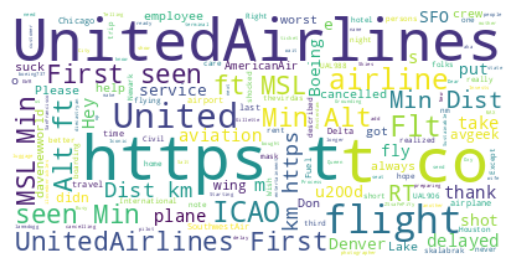

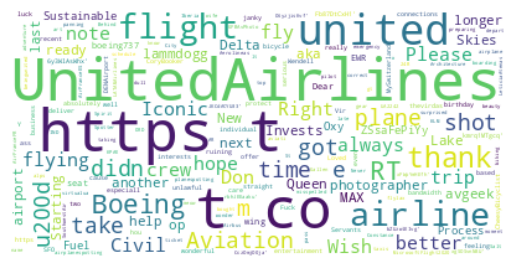

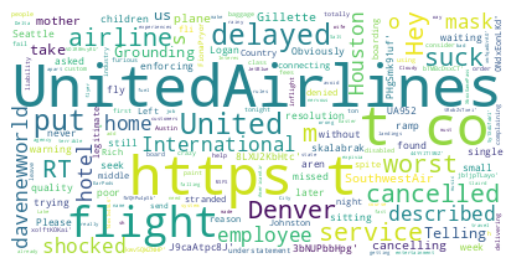

In [96]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

In [97]:
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))

In [98]:
tokenized_word = word_tokenize(str(tw_list["text"]
                                  ))
filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
fdist = FreqDist(filtered_sent)

In [76]:
fdist

FreqDist({'UnitedAirlines': 8, 'https': 8, 'co': 8, 'flight': 4, '2': 3, 'I': 3, ':': 3, '0': 2, 'united': 2, '04': 2, ...})

In [99]:
fd = pd.DataFrame(fdist.most_common(10),                    \
    columns = ["Word","Frequency"]).drop([0]).reindex()

In [100]:
import plotly.express as px
fig = px.bar(fd, x="Word", y="Frequency")
fig.update_traces(marker_color='rgb(240,128,128)',          \
    marker_line_color='rgb(8,48,107)',                      \
    marker_line_width=1.5, opacity=0.8)
fig.show()

In [101]:
!jupyter labextension list

JupyterLab v1.2.21
No installed extensions


In [102]:
!jupyter labextension install jupyterlab-plotly

An error occured.
ValueError: Please install nodejs 5+ and npm before continuing installation. nodejs may be installed using conda or directly from the nodejs website.
See the log file for details:  /tmp/jupyterlab-debug-657pf_93.log
